In [467]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [468]:
data = pd.read_csv("netflix_titles.csv")

## Data Analyse

In [469]:
data.columns

Index(['show id ', 'Type', 'Title  ', '    Director', '  Cast  ', 'country',
       ' date added', 'release year', 'rating', 'duration', 'listed in',
       'description'],
      dtype='object')

columns names are invalid 

In [470]:
data.shape

(8807, 12)

In [471]:
data.head()

,show id,Type,Title,Director,Cast,country,date added,release year,rating,duration,listed in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020.0,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021.0,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021.0,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


show_id – Unique identifier   
type – Movie or TV Show                
title – Name of the content                  
director – Director name                  
cast – Actors                   
country – Country of production                
date_added – Date when content was added to Netflix                 
release_year – Year of release                
rating – Audience rating                           
duration – Duration in minutes or seasons                
listed_in – Genre                    
description – Short summary                    

In [472]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   show id       8807 non-null   object 
 1   Type          8807 non-null   object 
 2   Title         8807 non-null   object 
 3       Director  6173 non-null   object 
 4     Cast        7982 non-null   object 
 5   country       7976 non-null   object 
 6    date added   8797 non-null   object 
 7   release year  8781 non-null   float64
 8   rating        8803 non-null   object 
 9   duration      8804 non-null   object 
 10  listed in     8807 non-null   object 
 11  description   8807 non-null   object 
dtypes: float64(1), object(11)
memory usage: 825.8+ KB


Data contain both categorical and numerical data     
columns has missing values too                     
date_added is in string type                
duration has minutes and seasons mix

In [473]:
data.describe()

,release year
count,8781.000000
mean,2014.178795
std,8.812598
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


## Data Cleaning

### data columns clean

In [474]:
data.columns = data.columns.str.strip().str.lower().str.replace(' ', '_')
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [475]:
for df_col in data.columns:
    if df_col != df_col.strip():
        print(df_col)

Data columns has no extra leading and trailing spaces now

### Data values clean

In [476]:
for col in data.select_dtypes(include='object'):
    if not data[col].equals(data[col].str.strip()):
        print(col)

title
date_added


In [477]:
for col in data.select_dtypes(include='object'):
    data[col] = data[col].str.strip()

In [478]:
for col in data.select_dtypes(include='object'):
    if not data[col].equals(data[col].str.strip()):
        print(col)

Data values are now clean

### Null cleaning

In [479]:
data.isnull().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year      26
rating             4
duration           3
listed_in          0
description        0
dtype: int64

director, cast, country , date_added, release year,rating, duration  has nulls

In [480]:
data = data.dropna(subset=['director', 
                           'cast', 
                           'country', 
                           'rating', 
                           'duration', 
                           'date_added'])


In [481]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    9
rating          0
duration        0
listed_in       0
description     0
dtype: int64

In [482]:
data.shape

(5332, 12)

now only realease year has nulls -- but it is int we can replace these and that should be <= year(date_added)

In [483]:
data.date_added.dtype

dtype('O')

In [484]:
# convert date_added to datetime form
data['date_added'] = pd.to_datetime(data['date_added'], errors='coerce')

In [485]:
data.date_added.dtype

dtype('<M8[ns]')

All date values are now in a standard datetime format, and invalid dates are safely identified.

In [486]:
data['year_added'] = data['date_added'].dt.year
data.year_added

7       2021
8       2021
9       2021
12      2021
24      2021
        ... 
8801    2016
8802    2019
8804    2019
8805    2020
8806    2019
Name: year_added, Length: 5332, dtype: int32

In [487]:
data['release_year'] = data['release_year'].fillna(data['year_added'])

In [488]:
data.isnull().sum()

show_id         0
type            0
title           0
director        0
cast            0
country         0
date_added      0
release_year    0
rating          0
duration        0
listed_in       0
description     0
year_added      0
dtype: int64

In [489]:
data = data.drop("year_added", axis=1)
data.columns

Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

Extra year_added column we make, should be delete

In [490]:
data.duplicated().sum()

np.int64(0)

In [491]:
data.shape

(5332, 12)

In [492]:
data.release_year.unique()

array([1993., 2021., 1998., 2010., 2013., 2017., 1975., 1978., 1983.,
       1987., 2012., 2001., 2002., 2003., 2004., 2011., 2008., 2009.,
       2007., 2005., 2006., 2018., 2020., 2019., 1994., 2015., 1982.,
       1989., 2014., 1990., 1991., 1999., 2016., 1986., 1996., 1984.,
       1997., 1961., 1995., 1985., 1992., 2000., 1976., 1959., 1988.,
       1980., 1972., 1981., 1964., 1954., 1979., 1958., 1956., 1963.,
       1970., 1973., 1960., 1974., 1966., 1971., 1962., 1969., 1977.,
       1967., 1968., 1965., 1945., 1946., 1955., 1942., 1947., 1944.])

### Outliers detection

In [493]:
data['release_year'].describe()

count    5332.000000
mean     2012.765754
std         9.614580
min      1942.000000
25%      2011.000000
50%      2016.000000
75%      2018.000000
max      2021.000000
Name: release_year, dtype: float64

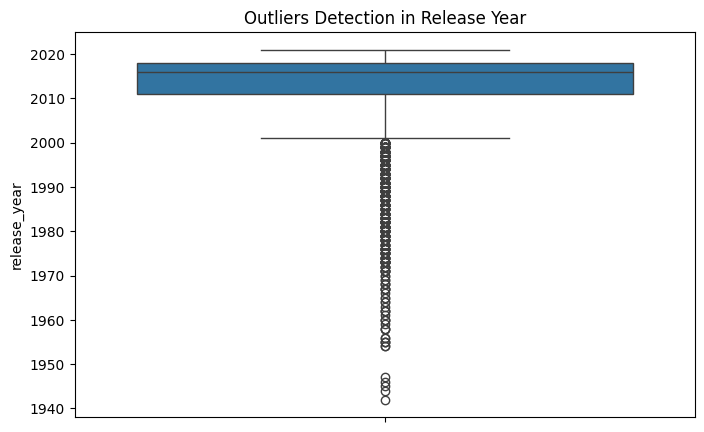

In [494]:
# BoxPlot

plt.figure(figsize=(8,5))
sns.boxplot(data=data["release_year"])

plt.title("Outliers Detection in Release Year")
plt.xticks(rotation=30)
plt.show()

In [495]:
# Step 1: Calculate quartiles
Q1 = data['release_year'].quantile(0.25)
Q3 = data['release_year'].quantile(0.75)

print(Q1)
print(Q3)


2011.0
2018.0


In [496]:
# Step 2: Calculate IQR
IQR = Q3 - Q1

print(IQR)

7.0


In [497]:
# Step 3: Define lower and upper bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# lowest value that is consider as normal
print("Lower bound:", lower_bound)  

# largest value that is consider as normal
print("Upper bound:", upper_bound)


Lower bound: 2000.5
Upper bound: 2028.5


In [498]:
# Step 4: Detect outliers
outliers = data[(data['release_year'] < lower_bound) | 
                (data['release_year'] > upper_bound)]
print("Number of outliers:", len(outliers))

Number of outliers: 470


Final conclude that the 470 records has release_year outlier

In [499]:
data[['type', 'duration']].head(10)

,type,duration
7,Movie,125 min
8,TV Show,9 Seasons
9,Movie,104 min
12,Movie,127 min
24,Movie,166 min
27,Movie,103 min
28,Movie,97 min
29,Movie,106 min
38,Movie,96 min
41,Movie,124 min


In [500]:
data.groupby('type')['duration'].describe()

,count,unique,top,freq
type,,,,
Movie,5185,188,94 min,135
TV Show,147,10,1 Season,106


movie types are typically in minutes and TV show types are in seasons   and data type is also object convert it to int

In [501]:
data['duration_int'] = data['duration'].str.extract(r'(\d+)').astype(int)

In [502]:
data['duration_int'].dtype

dtype('int64')

In [503]:
data.duration_int

7       125
8         9
9       104
12      127
24      166
       ... 
8801     96
8802    158
8804     88
8805     88
8806    111
Name: duration_int, Length: 5332, dtype: int64

In [504]:
movies = data[data["type"]=='Movie']
tv_shows = data[data["type"]=='TV Show']

Splited type column in 2                      
now movie duration in minutes                
and TV show duration in seasons

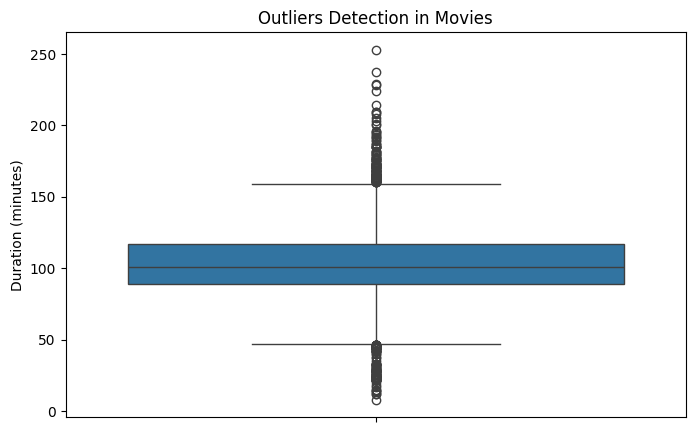

In [505]:
plt.figure(figsize=(8,5))
sns.boxplot(data=movies["duration_int"])

plt.title("Outliers Detection in Movies")
plt.ylabel("Duration (minutes)")
plt.show()

In [509]:
Q1 = movies['duration_int'].quantile(0.25)
Q3 = movies['duration_int'].quantile(0.75)
IQR = Q3 - Q1

print(Q1)
print(Q3)
print(IQR)

89.0
117.0
28.0


In [511]:
lower_movie = Q1 - 1.5 * IQR
upper_movie = Q3 + 1.5 * IQR

print("Lower bound:", lower_movie)  

# largest value that is consider as normal
print("Upper bound:", upper_movie)

Lower bound: 47.0
Upper bound: 159.0


In [514]:
movie_outliers = movies[
                (movies['duration_int'] < lower_movie) | 
                (movies['duration_int'] > upper_movie)]
print("Number of outliers:", len(movie_outliers))

Number of outliers: 249


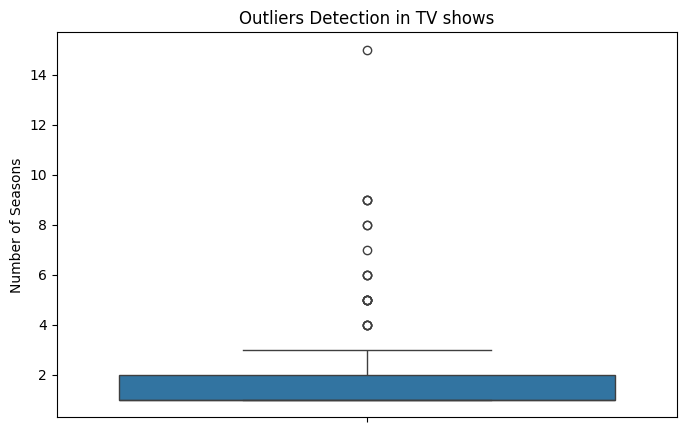

In [508]:
plt.figure(figsize=(8,5))
sns.boxplot(data=tv_shows['duration_int'])
plt.title('Outliers Detection in TV shows')
plt.ylabel('Number of Seasons')
plt.show()